### [D1030_work_조주영]
#### 데이터 :  남북한발전전력량.xlsx
- (1) 남한의 종류별 발전전력량의 변화
- (2) 북한의 종류별 발전전력량의 변화
- (3) 남한과 북한의 비교
- (4) 북한의 신재생 컬럼/남북한 합계, 항목별 총합 컬럼 추가

In [65]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [66]:

## 판다스 출력 설정
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

DATA_FILE = '../data/남북한발전전력량.xlsx'

dfElec = pd.read_excel(DATA_FILE)

In [67]:
## 데이터 확인
display(dfElec.tail())
dfElec.info()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4,NaN,신재생,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,170,186,194,202,190,196,206,215,225,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,102,103,102,106,106,117,125,131,126,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,68,83,92,96,84,79,81,84,99,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

[1] 남한의 종류별 발전전력량의 변화 <hr>

In [68]:
## 남한 데이터만 선택
southDF = dfElec.iloc[1:5, 1:]
#southDF = southDF.drop(['전력량 (억㎾h)'], axis=1)
southDF = southDF.set_index('발전 전력별')

pd.set_option('future.no_silent_downcasting', True)

## 결측치를 NaN으로 변경 ('-' 문자를 NaN으로)
southDF = southDF.replace('-', np.nan)

## 결측치를 0으로 채우기
southDF = southDF.fillna(0)

## 자료형을 int로 변환
southDF = southDF.astype(int)

## 자료형 확인
print(southDF.dtypes.iloc[0])
display(southDF.head())

int64


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,,,,,,,
수력,64,51,49,60,41,55,52,54,61,61,56,42,53,69,59,52,52,50,56,56,65,78,77,84,78,58,66
화력,484,573,696,803,1022,1122,1264,1420,1195,1302,1518,1689,1821,1859,2056,2127,2272,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
원자력,529,563,565,581,587,670,739,771,897,1031,1090,1121,1191,1297,1307,1468,1487,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
신재생,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,118,151,173,195


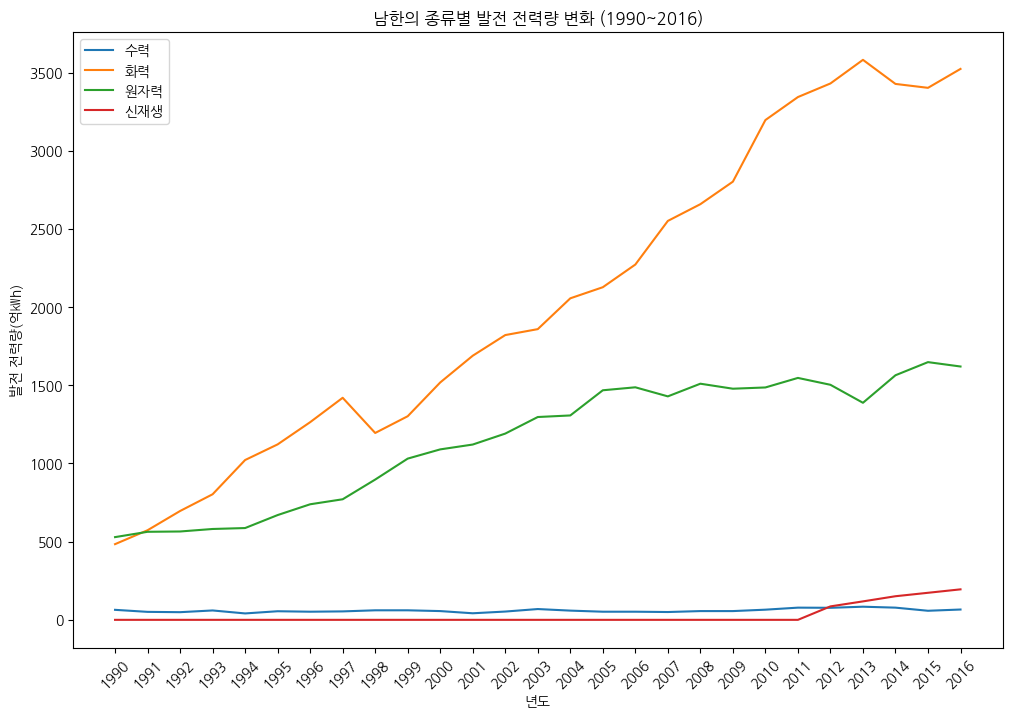

In [69]:
## 그래프 크기 설정
plt.figure(figsize=(12, 8))

## 각 발전 종류별 선 그래프 그리기
for label_idx in southDF.index:
    plt.plot(southDF.columns, southDF.loc[label_idx], label=label_idx)      # x값, y값, 범주 값

## 그래프 설정
plt.legend()
plt.title('남한의 종류별 발전 전력량 변화 (1990~2016)')
plt.xlabel('년도')
plt.ylabel('발전 전력량(억㎾h)')
plt.xticks(rotation=45)
plt.show()

[2] 북한의 종류별 발전전력량의 변화 <hr>

In [70]:
## 북한 데이터만 선택
northDF = dfElec.iloc[6:, 1:]
northDF = northDF.set_index('발전 전력별')

pd.set_option('future.no_silent_downcasting', True)

## 결측치를 NaN으로 변경 ('-' 문자를 NaN으로)
northDF = northDF.replace('-', np.nan)

## 결측치를 0으로 채우기
northDF = northDF.fillna(0)

## 자료형을 int로 변환
northDF = northDF.astype(int)

## 자료형 확인
print(northDF.dtypes.iloc[0])
display(northDF.head())

int64


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,,,,,,,
수력,156,150,142,133,138,142,125,107,102,103,102,106,106,117,125,131,126,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,92,96,84,79,81,84,99,103,114,110,103,79,80,82,86,90,111
원자력,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


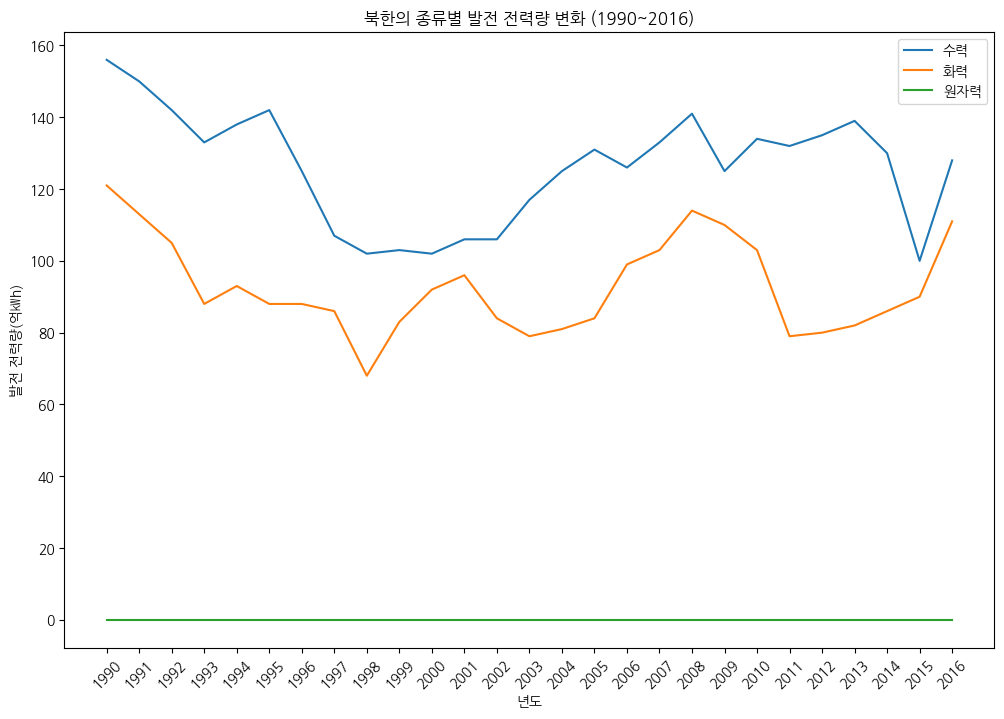

In [71]:
## 그래프 크기 설정
plt.figure(figsize=(12, 8))

## 각 발전 종류별 선 그래프 그리기
for label_idx in northDF.index:
    plt.plot(northDF.columns, northDF.loc[label_idx], label=label_idx)      # x값, y값, 범주 값

## 그래프 설정
plt.legend()
plt.title('북한의 종류별 발전 전력량 변화 (1990~2016)')
plt.xlabel('년도')
plt.ylabel('발전 전력량(억㎾h)')
plt.xticks(rotation=45)
plt.show()

[3] 남한과 북한의 비교 <hr>

In [72]:
## 남한 북한의 합게 데이터만 선택
peninDF = dfElec.iloc[[0, 5], 1:]
peninDF = peninDF.set_index('발전 전력별')

peninDF.index = ['남한', '북한']

pd.set_option('future.no_silent_downcasting', True)

## 결측치를 NaN으로 변경 ('-' 문자를 NaN으로)
peninDF = peninDF.replace('-', np.nan)

## 결측치를 0으로 채우기
peninDF = peninDF.fillna(0)

# ## 자료형을 int로 변환
peninDF = peninDF.astype(int)

# ## 자료형 확인
print(peninDF.dtypes.iloc[0])
display(peninDF.head())

int64


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
남한,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,2852,3065,3225,3421,3646,3812,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
북한,277,263,247,221,231,230,213,193,170,186,194,202,190,196,206,215,225,236,255,235,237,211,215,221,216,190,239


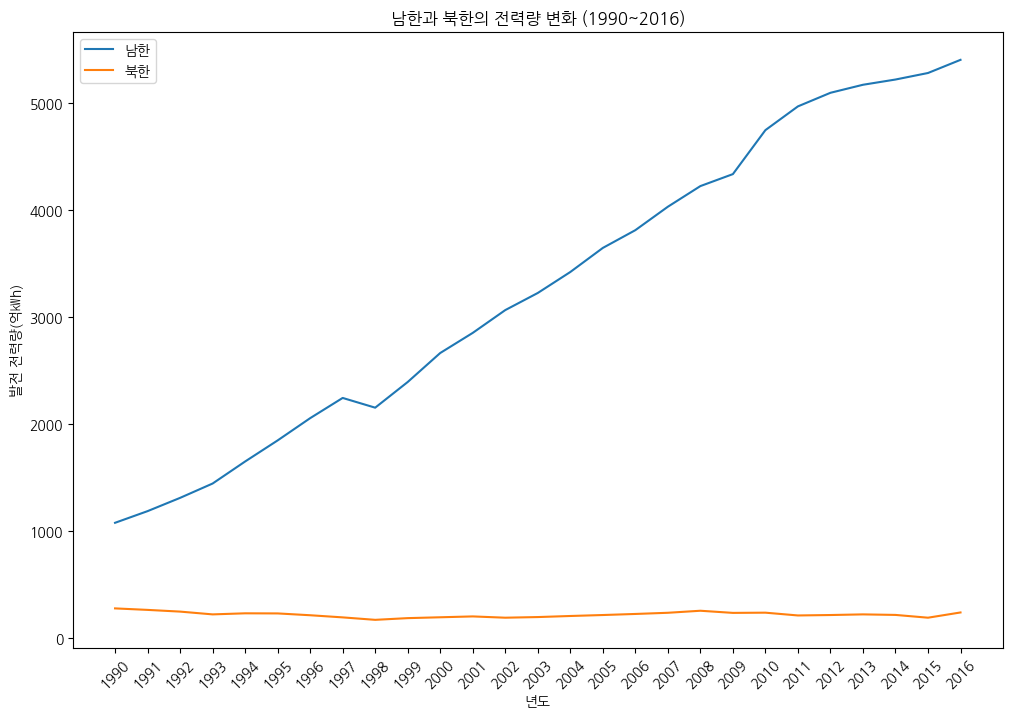

In [73]:
## 그래프 크기 설정
plt.figure(figsize=(12, 8))

## 각 발전 종류별 선 그래프 그리기
for label_idx in peninDF.index:
    plt.plot(peninDF.columns, peninDF.loc[label_idx], label=label_idx)      # x값, y값, 범주 값

## 그래프 설정
plt.legend()
plt.title('남한과 북한의 전력량 변화 (1990~2016)')
plt.xlabel('년도')
plt.ylabel('발전 전력량(억㎾h)')
plt.xticks(rotation=45)
plt.show()

[4] 북한의 신재생 컬럼/남북한 합계, 항목별 총합 컬럼 추가 <hr>

In [ ]:
## (1) 원본 복사 및 전력량 결측치 보정
dfElec2 = dfElec.copy()
dfElec2['전력량 (억㎾h)'] = dfElec2['전력량 (억㎾h)'].ffill()       # 결측치 최근 값으로 채우기
dfElec2 = dfElec2.set_index(['전력량 (억㎾h)', '발전 전력별'])      # 멀티 인덱스 설정


## (2) '-'를 0으로 변환
dfElec2 = dfElec2.replace('-', 0)

## (3) 모두 float 타입으로 변환
num_cols = dfElec2.columns[2:]  # 1990년 이후 컬럼
dfElec2[num_cols] = dfElec2[num_cols].apply(pd.to_numeric, errors='coerce')

## ------------------------------------------------------------------------------
## (4) 신재생 행(북한)과 전체 합계 행 추가
dfElec2.loc[('북한', '신재생'), :] = [0] * len(dfElec2.columns)


## (5) 남북한 합계 계산 후 행 추가
dfElec2.loc[('전체', '남북한 합계'), :] = (
    dfElec2.loc[('남한', '합계'), :] + dfElec2.loc[('북한', '합계'), :]
)

# ## (6) 항목별 총합 컬럼 추가
dfElec2['총합'] = dfElec2.sum(axis=1)

# ## (7) 결과 확인
display(dfElec2)


1990  1991    1992    1993    1994    1995    1996    1997  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310.0  1444.0  1650.0  1847.0  2055.0  2244.0   
          수력        64    51    49.0    60.0    41.0    55.0    52.0    54.0   
          화력       484   573   696.0   803.0  1022.0  1122.0  1264.0  1420.0   
          원자력      529   563   565.0   581.0   587.0   670.0   739.0   771.0   
          신재생        0     0     0.0     0.0     0.0     0.0     0.0     0.0   
북한        합계       277   263   247.0   221.0   231.0   230.0   213.0   193.0   
          수력       156   150   142.0   133.0   138.0   142.0   125.0   107.0   
          화력       121   113   105.0    88.0    93.0    88.0    88.0    86.0   
          원자력        0     0     0.0     0.0     0.0     0.0     0.0     0.0   
          신재생        0     0     0.0     0.0     0.0     0.0     0.0     0.0   
전체        남북한 합계  1354  1449  1557.0  1665.0  1881.0  2077.0  2268.0  2437.0   

                    1998    1999    2000    2001    2002    2003    2004  \
전력량 (억㎾h) 발전 전력별                                                           
남한        합계      2153.0  2393.0  2664.0  2852.0  3065.0  3225.0  3421.0   
          수력        61.0    61.0    56.0    42.0    53.0    69.0    59.0   
          화력      1195.0  1302.0  1518.0  1689.0  1821.0  1859.0  2056.0   
          원자력      897.0  1031.0  1090.0  1121.0  1191.0  1297.0  1307.0   
          신재생        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
북한        합계       170.0   186.0   194.0   202.0   190.0   196.0   206.0   
          수력       102.0   103.0   102.0   106.0   106.0   117.0   125.0   
          화력        68.0    83.0    92.0    96.0    84.0    79.0    81.0   
          원자력        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
          신재생        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
전체        남북한 합계  2323.0  2579.0  2858.0  3054.0  3255.0  3421.0  3627.0   

                    2005    2006    2007    2008    2009    2010    2011  \
전력량 (억㎾h) 발전 전력별                                                           
남한        합계      3646.0  3812.0  4031.0  4224.0  4336.0  4747.0  4969.0   
          수력        52.0    52.0    50.0    56.0    56.0    65.0    78.0   
          화력      2127.0  2272.0  2551.0  2658.0  2802.0  3196.0  3343.0   
          원자력     1468.0  1487.0  1429.0  1510.0  1478.0  1486.0  1547.0   
          신재생        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
북한        합계       215.0   225.0   236.0   255.0   235.0   237.0   211.0   
          수력       131.0   126.0   133.0   141.0   125.0   134.0   132.0   
          화력        84.0    99.0   103.0   114.0   110.0   103.0    79.0   
          원자력        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
          신재생        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
전체        남북한 합계  3861.0  4037.0  4267.0  4479.0  4571.0  4984.0  5180.0   

                    2012    2013    2014    2015    2016       총합  
전력량 (억㎾h) 발전 전력별                                                   
남한        합계      5096.0  5171.0  5220.0  5281.0  5404.0  88523.0  
          수력        77.0    84.0    78.0    58.0    66.0   1599.0  
          화력      3430.0  3581.0  3427.0  3402.0  3523.0  55136.0  
          원자력     1503.0  1388.0  1564.0  1648.0  1620.0  31067.0  
          신재생       86.0   118.0   151.0   173.0   195.0    723.0  
북한        합계       215.0   221.0   216.0   190.0   239.0   5914.0  
          수력       135.0   139.0   130.0   100.0   128.0   3408.0  
          화력        80.0    82.0    86.0    90.0   111.0   2506.0  
          원자력        0.0     0.0     0.0     0.0     0.0      0.0  
          신재생        0.0     0.0     0.0     0.0     0.0      0.0  
전체        남북한 합계  5311.0  5392.0  5436.0  5471.0  5643.0  94437.0